In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### prepare for histogram

In [69]:
df = pd.read_csv('./data/TPM.csv')

In [9]:
df.columns

Index(['Unnamed: 0', 'variable', 'values'], dtype='object')

In [22]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
def replace_dot(df, col):
    """replace . in dbname by _ for d3js"""
    #dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    dbname = df[col].replace(".", "_")
    return dbname


In [27]:
df['variable'] = df.apply(replace_dot, args=['variable'], axis=1 )

In [29]:
df.to_csv("./data/TPM.csv", index=False)

In [31]:
df['variable'].values

array(['dcr_nham1_ugri_v1_5_10yrs', 'dcr_nham1_ugri_v1_5_10yrs',
       'dcr_nham1_ugri_v1_5_10yrs', ..., 'filterdist_indx5_v1_5_10yrs',
       'filterdist_indx5_v1_5_10yrs', 'filterdist_indx5_v1_5_10yrs'],
      dtype=object)

In [37]:
list( np.unique( np.sort( df['variable'].values ) ) )

['agnddf_v1_5_10yrs',
 'alt_dust_v1_5_10yrs',
 'alt_roll_mod2_dust_sdf_0_20_v1_5_10yrs',
 'baseline_2snaps_v1_5_10yrs',
 'baseline_samefilt_v1_5_10yrs',
 'baseline_v1_5_10yrs',
 'bulges_bs_v1_5_10yrs',
 'bulges_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_bs_v1_5_10yrs',
 'bulges_cadence_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_i_heavy_v1_5_10yrs',
 'bulges_i_heavy_v1_5_10yrs',
 'daily_ddf_v1_5_10yrs',
 'dcr_nham1_ug_v1_5_10yrs',
 'dcr_nham1_ugr_v1_5_10yrs',
 'dcr_nham1_ugri_v1_5_10yrs',
 'dcr_nham2_ug_v1_5_10yrs',
 'dcr_nham2_ugr_v1_5_10yrs',
 'dcr_nham2_ugri_v1_5_10yrs',
 'descddf_v1_5_10yrs',
 'filterdist_indx1_v1_5_10yrs',
 'filterdist_indx2_v1_5_10yrs',
 'filterdist_indx3_v1_5_10yrs',
 'filterdist_indx4_v1_5_10yrs',
 'filterdist_indx5_v1_5_10yrs',
 'filterdist_indx6_v1_5_10yrs',
 'filterdist_indx7_v1_5_10yrs',
 'filterdist_indx8_v1_5_10yrs',
 'footprint_add_mag_cloudsv1_5_10yrs',
 'footprint_big_sky_dustv1_5_10yrs',
 'footprint_big_sky_nouiyv1_5_10yrs',
 'footprint_big_skyv1_5_10yrs',
 

### prepare for radar plots

In [70]:
def replace_dot(df):
    """replace . in dbname by _ for d3js"""
    dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    return dbname
    
def get_df_radar_d3js(df_radar):
    """get csv data for d3js radar plot"""
    df_radar['db'] = df_radar.apply(replace_dot, axis=1)
    df_radar_t = df_radar.set_index('db').T.reset_index().rename(columns={'index':'section'})
    return df_radar_t


In [85]:
df_radar = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/all_foms_timedomain_astrometry.csv')


df_radar = df_radar.drop('family', axis=1)
df_radar = df_radar.drop('Unnamed: 0', axis=1)



In [86]:
df_radar["PM"] = 1/3 * (df_radar["TPM"] + df_radar["LS"] + df_radar["CI"])

In [87]:
df_radar = df_radar.drop('TPM', axis=1)
df_radar = df_radar.drop('LS', axis=1)
df_radar = df_radar.drop('CI', axis=1)




In [88]:
df_radar_t = get_df_radar_d3js(df_radar)
df_radar_t.to_csv("data/df_radar_all_foms2_t.csv", index=False)


In [89]:
df_radar_t

db,section,agnddf,alt_dust,alt_roll_mod2_dust_sdf_0_20,baseline_2snaps,baseline_samefilt,baseline,bulges_bs,bulges_bulge_wfd,bulges_cadence_bs,...,wfd_depth_scale0_80_noddf,wfd_depth_scale0_80,wfd_depth_scale0_85_noddf,wfd_depth_scale0_85,wfd_depth_scale0_90_noddf,wfd_depth_scale0_90,wfd_depth_scale0_95_noddf,wfd_depth_scale0_95,wfd_depth_scale0_99_noddf,wfd_depth_scale0_99
0,flux change,0.132988,0.133044,0.138956,0.135375,0.206479,0.142425,0.122704,0.126914,0.130511,...,0.149917,0.144886,0.158663,0.157811,0.153213,0.149066,0.138201,0.157164,0.153669,0.150922
1,color,0.503818,0.703636,0.795575,0.461125,0.190582,0.542411,0.396956,0.391134,0.408157,...,0.510940,0.463325,0.547196,0.494813,0.580788,0.522871,0.610349,0.551025,0.663368,0.609797
2,footprint,0.717233,0.442079,0.551082,0.437133,0.519281,0.752009,0.325309,0.309274,0.327589,...,0.655294,0.468470,0.797643,0.613872,0.872836,0.741422,0.940147,0.844745,0.975811,0.911669
3,star count,0.728116,0.254255,0.306606,0.467183,0.504146,0.766289,0.268242,0.241618,0.263078,...,0.676951,0.497516,0.795106,0.641503,0.846012,0.766310,0.925828,0.837897,0.940291,0.900263
4,depth,0.931742,0.800220,0.692088,0.863893,0.866805,0.922776,0.927274,0.929885,0.923457,...,0.933398,0.913452,0.938971,0.915785,0.938782,0.920611,0.942230,0.921092,0.942138,0.920876
5,PM,0.360996,0.437974,0.608098,0.657432,0.407147,0.408935,0.399158,0.497079,0.480139,...,0.487117,0.493935,0.417698,0.462134,0.470938,0.366446,0.505863,0.402378,0.373185,0.702034


In [150]:
df_pm_v15 = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/Score_foms_v1.5_10yrs.csv')
df_pm_v17 = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/Score_foms_v1.7_10yrs.csv')



In [151]:
df_pm_v15.head(2)

,Unnamed: 0,TPM,LS,CI
0,dcr_nham1_ugri_v1.5_10yrs,0.643610,0.475287,0.712348
1,rolling_mod6_sdf_0.20_v1.5_10yrs,0.719596,0.545273,0.700522


In [152]:
df_pm_v15.rename(columns={"Unnamed: 0":"db"}, inplace=True)
df_pm_v17.rename(columns={"Unnamed: 0":"db"}, inplace=True)

df_pm_v15.sort_values(by='db', inplace=True)

df_pm_v17.sort_values(by='db', inplace=True)

In [73]:
df_pm = df_pm_v15.append(df_pm_v17, ignore_index=True)


In [156]:
def scale(arr, mode=0):
    """scale array by max or scale to 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr


In [65]:
df_pm.columns

Index(['db', 'TPM', 'LS', 'CI'], dtype='object')

In [75]:
for col in ['TPM', 'LS', 'CI']:
    df_pm[col] = scale( df_pm[col].values )

In [76]:
df_pm.to_csv("data/df_radar_pm_10yrs.csv",index=False)

df_radar_t = get_df_radar_d3js(df_pm)
df_radar_t.to_csv("data/df_radar_pm_10yrs_t.csv", index=False)



In [77]:
ls data

Fields_nside16.csv       data_IC.csv              df_radar_pm_2yrs_t.csv
Fields_nside64.csv       data_doubleHist.csv      df_radar_wfd.csv
TPM.csv                  df_radar.csv             df_radar_wfd_t.csv
TwoNum.csv               df_radar_all_foms.csv    df_rank.csv
data_11.csv              df_radar_all_foms_t.csv  df_rank_t.csv
data_12.csv              df_radar_pm_10yrs.csv    heatmap_data.csv
data_12_2.csv            df_radar_pm_10yrs_t.csv  iris.csv


In [78]:
df_radar_t

db,section,agnddf,alt_dust,alt_roll_mod2_dust_sdf_0_20,baseline_2snaps,baseline_samefilt,baseline,bulges_bs,bulges_bulge_wfd,bulges_cadence_bs,...,twi_neo_pattern6_v1_7_10yrs,twi_neo_pattern7_v1_7_10yrs,twi_pairs_mixed_repeat_v1_7_10yrs,twi_pairs_mixed_v1_7_10yrs,twi_pairs_repeat_v1_7_10yrs,twi_pairs_v1_7_10yrs,u_long_ms_30_v1_7_10yrs,u_long_ms_40_v1_7_10yrs,u_long_ms_50_v1_7_10yrs,u_long_ms_60_v1_7_10yrs
0,TPM,0.793800,0.796910,0.725070,0.803958,0.833242,0.792020,0.633561,0.621486,0.625616,...,0.706006,0.777165,0.624409,0.608860,0.657788,0.595258,0.777264,0.752384,0.729322,0.744588
1,LS,0.449657,0.549249,0.527580,0.479428,0.478071,0.476087,0.492866,0.485462,0.486134,...,0.730189,0.746686,0.775209,0.782503,0.794939,0.791407,0.734065,0.769304,0.786162,0.768732
2,CI,0.700429,0.665481,0.660286,0.650577,0.752308,0.698308,0.634528,0.625488,0.634575,...,0.906488,0.913767,0.942149,0.951681,0.944306,0.955021,0.974635,0.955746,0.930184,0.909624


### data for barh 

In [161]:
df_pm_v15 = pd.read_csv('https://github.com/fedhere/LSSTunknowns/raw/master/pmAnom/Score_foms_v1.5_10yrs.csv')
df_pm_v15.rename(columns={"Unnamed: 0":"db"}, inplace=True)

df_pm_v15.sort_values(by='db', inplace=True, ignore_index=True)


In [162]:
for col in ['TPM', 'LS', 'CI']:
    df_pm_v15[col] = scale( df_pm_v15[col].values, mode=1 )


In [170]:
def replace_dot(df):
    """replace . in dbname by _ for d3js"""
    #dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    dbname = df['db'].replace(".", "_")

    return dbname
  

In [172]:
def get_df_radar_d3js(df_radar):
    """get csv data for d3js radar plot"""
    df_radar['db'] = df_radar.apply(replace_dot, axis=1)
    df_radar_t = df_radar.set_index('db').T.reset_index().rename(columns={'index':'section'})
    return df_radar_t



In [166]:
df_pm_v15['db'] = df_pm_v15.apply(replace_dot, axis=1)

In [168]:
df_pm_v15.to_csv("./data/df_pm_v15.csv", index=False)

In [173]:
df_radar_t = get_df_radar_d3js(df_pm_v15)
df_radar_t.to_csv("data/df_pm_v15_t.csv", index=False)


In [174]:
df_radar_t

db,section,agnddf_v1_5_10yrs,alt_dust_v1_5_10yrs,alt_roll_mod2_dust_sdf_0_20_v1_5_10yrs,baseline_2snaps_v1_5_10yrs,baseline_samefilt_v1_5_10yrs,baseline_v1_5_10yrs,bulges_bs_v1_5_10yrs,bulges_bulge_wfd_v1_5_10yrs,bulges_cadence_bs_v1_5_10yrs,...,wfd_depth_scale0_80_noddf_v1_5_10yrs,wfd_depth_scale0_80_v1_5_10yrs,wfd_depth_scale0_85_noddf_v1_5_10yrs,wfd_depth_scale0_85_v1_5_10yrs,wfd_depth_scale0_90_noddf_v1_5_10yrs,wfd_depth_scale0_90_v1_5_10yrs,wfd_depth_scale0_95_noddf_v1_5_10yrs,wfd_depth_scale0_95_v1_5_10yrs,wfd_depth_scale0_99_noddf_v1_5_10yrs,wfd_depth_scale0_99_v1_5_10yrs
0,TPM,0.679991,0.684818,0.573327,0.695757,0.741202,0.677229,0.431311,0.412572,0.418982,...,0.803227,0.503560,0.576778,0.628100,0.723074,0.646521,0.682017,0.698015,0.742214,0.759245
1,LS,0.159391,0.311512,0.278414,0.204864,0.202792,0.199761,0.225390,0.214081,0.215108,...,0.181797,0.208472,0.159836,0.172488,0.186500,0.192803,0.133056,0.154708,0.168470,0.208935
2,CI,0.455847,0.392367,0.382931,0.365295,0.550083,0.451995,0.336142,0.319722,0.336228,...,0.430939,0.393979,0.470765,0.431916,0.494811,0.455007,0.525985,0.484504,0.557374,0.501368


In [176]:
list(df_pm_v15['db'].values)

['agnddf_v1_5_10yrs',
 'alt_dust_v1_5_10yrs',
 'alt_roll_mod2_dust_sdf_0_20_v1_5_10yrs',
 'baseline_2snaps_v1_5_10yrs',
 'baseline_samefilt_v1_5_10yrs',
 'baseline_v1_5_10yrs',
 'bulges_bs_v1_5_10yrs',
 'bulges_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_bs_v1_5_10yrs',
 'bulges_cadence_bulge_wfd_v1_5_10yrs',
 'bulges_cadence_i_heavy_v1_5_10yrs',
 'bulges_i_heavy_v1_5_10yrs',
 'daily_ddf_v1_5_10yrs',
 'dcr_nham1_ug_v1_5_10yrs',
 'dcr_nham1_ugr_v1_5_10yrs',
 'dcr_nham1_ugri_v1_5_10yrs',
 'dcr_nham2_ug_v1_5_10yrs',
 'dcr_nham2_ugr_v1_5_10yrs',
 'dcr_nham2_ugri_v1_5_10yrs',
 'descddf_v1_5_10yrs',
 'filterdist_indx1_v1_5_10yrs',
 'filterdist_indx2_v1_5_10yrs',
 'filterdist_indx3_v1_5_10yrs',
 'filterdist_indx4_v1_5_10yrs',
 'filterdist_indx5_v1_5_10yrs',
 'filterdist_indx6_v1_5_10yrs',
 'filterdist_indx7_v1_5_10yrs',
 'filterdist_indx8_v1_5_10yrs',
 'footprint_add_mag_cloudsv1_5_10yrs',
 'footprint_big_sky_dustv1_5_10yrs',
 'footprint_big_sky_nouiyv1_5_10yrs',
 'footprint_big_skyv1_5_10yrs',
 

### skymap data

In [10]:
ls 'data'

Fields_nside16.csv        data_doubleHist.csv       df_radar_wfd.csv
Fields_nside64.csv        df_radar.csv              df_radar_wfd_t.csv
TPM.csv                   df_radar_all_foms.csv     df_rank.csv
TwoNum.csv                df_radar_all_foms2_t.csv  df_rank_t.csv
data_11.csv               df_radar_all_foms_t.csv   heatmap_data.csv
data_12.csv               df_radar_pm_10yrs.csv     iris.csv
data_12_2.csv             df_radar_pm_10yrs_t.csv   tmp_map.pickle
data_IC.csv               df_radar_pm_2yrs_t.csv


In [30]:
def replace_dot(df, col):
    """replace . in dbname by _ for d3js"""
    #dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    dbname = df[col].replace(".", "_")
    return dbname



In [97]:
df = pd.read_pickle("./data/tmp_map.pickle")

In [98]:
df.reset_index(inplace=True)

In [99]:
df.rename({'index': 'db'}, axis=1, inplace=True)


In [100]:
df.sort_values(by="db", ascending=True, ignore_index=True, inplace=True)

In [101]:
df['db'] = df.apply(replace_dot, args=['db'], axis=1 )

In [102]:
df.head(2)

,db,coo,values
0,agnddf_v1_5_10yrs,"[[0.04908738521234052, 0.08343008661061502], [...","[0.353322528363047, 0.32392363931762796, 0.235..."
1,alt_dust_v1_5_10yrs,"[[0.0, 0.20987059226273774], [0.09817477042468...","[0.3466450435840259, 0.3185035389282103, 0.323..."


In [103]:
df_skymap = pd.DataFrame(columns=['db', 'RA', 'Dec', 'value'])


for i in range(86):
    df_skymap_i = pd.DataFrame()
    coord = df.iloc[i]['coo']
    df_skymap_i['db'] = [ df.iloc[i]['db'] ] * coord.shape[0]
    df_skymap_i['fieldRa'] = coord[:,0] * 180/np.pi  # convert to degree
    df_skymap_i['fieldDec'] = coord[:,1] * 180/np.pi
    df_skymap_i['value'] = df.iloc[i]['values'].data

    df_skymap = pd.concat([df_skymap, df_skymap_i], ignore_index=True)



In [104]:
df_skymap.to_csv("./data/pm_skymap.csv", index=False)

In [105]:
df_skymap.head()

,db,RA,Dec,value,fieldRa,fieldDec
0,agnddf_v1_5_10yrs,NaN,NaN,0.353323,2.8125,4.780192
1,agnddf_v1_5_10yrs,NaN,NaN,0.323924,8.4375,4.780192
2,agnddf_v1_5_10yrs,NaN,NaN,0.235091,14.0625,4.780192
3,agnddf_v1_5_10yrs,NaN,NaN,0.168455,19.6875,4.780192
4,agnddf_v1_5_10yrs,NaN,NaN,0.306710,25.3125,4.780192


### light curve

In [136]:
lc_dic = pd.read_pickle('data/GPalltemplfit_Ib_B_V0.pkl')

In [137]:
df = pd.DataFrame(lc_dic)
df.head()

,t,average,averageShifted,variance,varianceShifted,stdev,stdShifted,rollingWeightedAverage,rollingWeightedStd,rollingMedian,rollingPc25,rollingPc75,median,pc25,pc75,meansmooth
0,-15.0,NaN,NaN,NaN,NaN,0.677319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,-14.5,NaN,NaN,NaN,NaN,0.638464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,-14.0,NaN,NaN,NaN,NaN,0.608229,0.0,NaN,NaN,NaN,NaN,NaN,-0.910613,-0.910613,-0.910613,0.0
3,-13.5,NaN,NaN,NaN,NaN,0.584688,0.0,NaN,NaN,NaN,NaN,NaN,-0.878367,-0.878367,-0.878367,0.0
4,-13.0,NaN,NaN,NaN,NaN,0.529372,0.0,NaN,NaN,NaN,NaN,NaN,-0.842413,-0.842413,-0.842413,0.0


In [138]:
df.fillna(0, axis=0, inplace=True)

In [126]:
df.head()

,t,average,averageShifted,variance,varianceShifted,stdev,stdShifted,rollingWeightedAverage,rollingWeightedStd,rollingMedian,rollingPc25,rollingPc75,median,pc25,pc75,meansmooth
0,-15.0,0.0,0.0,0.0,0.0,0.677319,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,-14.5,0.0,0.0,0.0,0.0,0.638464,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,-14.0,0.0,0.0,0.0,0.0,0.608229,0.0,0.0,0.0,0.0,0.0,0.0,-0.910613,-0.910613,-0.910613,0.0
3,-13.5,0.0,0.0,0.0,0.0,0.584688,0.0,0.0,0.0,0.0,0.0,0.0,-0.878367,-0.878367,-0.878367,0.0
4,-13.0,0.0,0.0,0.0,0.0,0.529372,0.0,0.0,0.0,0.0,0.0,0.0,-0.842413,-0.842413,-0.842413,0.0


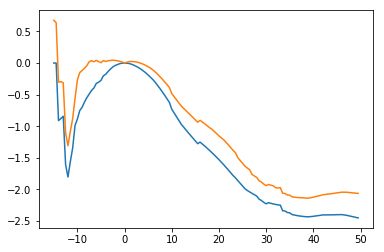

In [139]:
plt.plot(df.t.values, df['median'].values)
plt.plot(df.t.values, df['median'].values + df['stdev'].values)

In [148]:
df_lc = pd.DataFrame()
df_lc['t'] = df['t'].values + 20
df_lc['mag'] = df['median'].values + 1
df_lc['stdev'] = df['stdev'].values
df_lc.head()

,t,mag,stdev
0,5.0,1.000000,0.677319
1,5.5,1.000000,0.638464
2,6.0,0.089387,0.608229
3,6.5,0.121633,0.584688
4,7.0,0.157587,0.529372


In [149]:
df_lc.to_csv("./data/GPtemp_Ic_B.csv", index=False)

In [135]:
df_lc.describe()

,t,mag,stdev
count,130.000000,130.000000,130.000000
mean,17.250000,-1.362276,0.309222
std,18.835914,0.899195,0.135261
min,-15.000000,-2.450928,0.000000
25%,1.125000,-2.315431,0.267647
50%,17.250000,-1.435157,0.308449
75%,33.375000,-0.464346,0.370007
max,49.500000,0.000000,0.677319
